In [10]:
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize
from sklearn.decomposition import PCA
from matplotlib import gridspec
from sklearn.utils import shuffle

In [11]:
def plot_data(X,y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [17]:
def TSNE_algo(X,y):

    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
#     NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
#     NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
#     Fraude=NEW_X[NEW_X['Class']==1]
#     Normal=NEW_X[NEW_X['Class']==0]
#     Normal=Normal.iloc[0:10000] #pour prendre que 10000 transaction normale
#     X=pd.concat([Normal,Fraude])
#     X=shuffle(X)
#     y=X.iloc[:,-1].values

    #TSNE
    x_test_2d = tsne.fit_transform(X)
    color_map = {0:'green', 1:'red'}
    plt.figure()
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x_test_2d[y==cl,0], 
                    y = x_test_2d[y==cl,1], 
                    c = color_map[idx], 
                    label = cl)
    plt.xlabel('Composant t-SNE 1')
    plt.ylabel('Composant t-SNE 2')
    plt.legend(loc='upper left')
    plt.title('Représentation des données avec T-SNE')
    plt.show()


In [18]:
def Distribution(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    #SNS COUNTPLOT
    fig,ax=plt.subplots(figsize=(5,5))
    sns.countplot(data=NEW_X,x="Class")
    plt.show()

In [19]:
def PCA_ALGO(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    X=shuffle(NEW_X)
    y=X.iloc[:,-1].values

    pca = PCA(n_components=2)
    pca_data=pca.fit_transform(X)
    print(pca_data.shape)
    pca_data=np.vstack((pca_data.T,y)).T
    print(pca_data.shape)
    print(pca_data)
    pca_df=pd.DataFrame(data=pca_data,columns=('PCA1','PCA2','Classe'))
    sns.FacetGrid(pca_df,hue='Classe',size=6).map(plt.scatter,'PCA1','PCA2').add_legend()
    plt.show()

In [20]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
colonnes_Y=['Class']

Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))

x = df.drop('Class', axis=1)
y = df['Class']


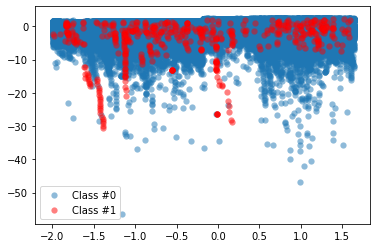

In [8]:
plot_data(np.array(x),np.array(y))

In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0.0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0.0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0.0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0.0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0.0


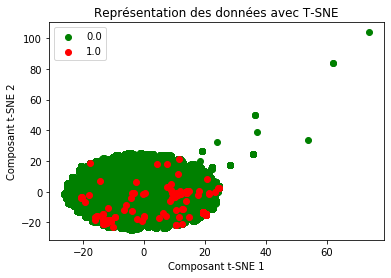

In [21]:
TSNE_algo(x,y)